In [1]:
#import libs

import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#import the data to a pandas dataframe
df = pd.read_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/20250618_King_county_house_sales_ks_JOIN.csv')

In [3]:
# Examine the usual suspects: head, tail, unique values etc. 
df.shape # len(df) gives the same
df.head()
df.tail()
df.columns
df.nunique() #df['colimn'].nunique() # gives you the number / df['column'].unique() # gives values
df.info()
df.describe()
df.isna().sum() # same as df.isnull().sum()
df.dtypes
df.duplicated()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [4]:
#date was an object -> converted to datetime (datetime64[ns])
df['date'] = pd.to_datetime(df['date'])

In [5]:
#check if column was converted succesfully to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   id.1           21597 non-null  int64         
 5   bedrooms       21597 non-null  float64       
 6   bathrooms      21597 non-null  float64       
 7   sqft_living    21597 non-null  float64       
 8   sqft_lot       21597 non-null  float64       
 9   floors         21597 non-null  float64       
 10  waterfront     19206 non-null  float64       
 11  view           21534 non-null  float64       
 12  condition      21597 non-null  int64         
 13  grade          21597 non-null  int64         
 14  sqft_above     21597 non-null  float64       
 15  sqft_basement  2114

In [6]:
#check Nans
df.isna().sum()
#waterfront       2391
#view               63
#sqft_basement     452
#yr_renovated     3848

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#fill nans wirh 0, so like no waterfront
#so basically since all the nans were in categorical columns, I filled those with "0", which is defined as "NO"
df.fillna({  
    'waterfront': 0,
    'view': 0,
    'sqft_basement': 0,
    'yr_renovated': 0
}, inplace=True) #overring

In [8]:
#check filling nans
df.isna().sum()


date             0
price            0
house_id         0
id               0
id.1             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
id.1                      int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

house_id                  int64 | price                  float64
id                        int64 |bedrooms                float64
id.1                      int64 |bathrooms               float64
grade                     int64 |sqft_living             float64
condition                 int64 |sqft_lot                float64
                                |sqft_above              float64
                                |sqft_basement           float64
                                |yr_built                  int64
                                |yr_renovated            float64
                                |zipcode                   int64
                                |lat                     float64
                                |long                    float64
                                |sqft_living15           float64
                                |sqft_lot15              float64


In [10]:
#Examine the descriptive statistics of the dataset.
df.describe()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,...,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,2014-10-29 04:20:38.171968512,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,...,7.658,1788.597,285.749,1971.000,687.582,98077.952,47.560,-122.214,1986.620,12758.284
min,2014-05-02 00:00:00,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2014-07-22 00:00:00,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,2014-10-16 00:00:00,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,2015-02-17 00:00:00,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,...,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,2015-05-27 00:00:00,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000
std,NaN,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,...,1.173,827.760,439.825,29.375,3640.375,53.513,0.139,0.141,685.230,27274.442


In [11]:
#analyze price
df['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

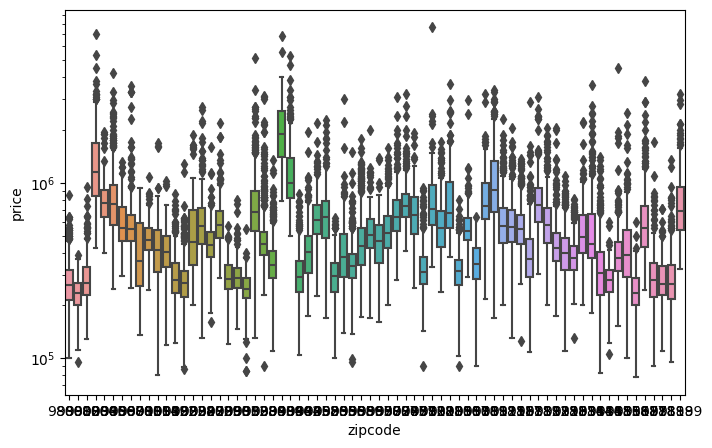

In [12]:
#prices comparison regarding zip/locations

sns.boxplot(data=df, x='zipcode', y='price')
plt.yscale('log')  # Set y-axis to log scale
plt.show()

In [13]:
#save; do not forget .csv within file name
df.to_csv('df1_understanding_the_data.csv',index=False)